# Základní přístupy k modelování reality

## 1. Úvod

V této kapitole se zaměříme na základní přístupy používané pro modelování reálných fenoménů. Matematické modely jsou zjednodušenými reprezentacemi reality, které nám umožňují porozumět, předpovídat a analyzovat chování komplexních systémů.

### 1.1 Newtonův zákon jako model

Jedním z nejznámějších příkladů matematického modelování je Newtonův druhý pohybový zákon:

$$F = m \cdot a$$

kde $F$ je síla působící na těleso, $m$ je hmotnost tělesa a $a$ je zrychlení tělesa. Tento jednoduchý vztah je základem klasické mechaniky a dokáže popsat širokou škálu fyzikálních jevů.

Vyzkoušejme si jednoduchou implementaci:



In [17]:
import scipy
print(dir(scipy.optimize))

['BFGS', 'Bounds', 'BroydenFirst', 'HessianUpdateStrategy', 'InverseJacobian', 'KrylovJacobian', 'LbfgsInvHessProduct', 'LinearConstraint', 'NoConvergence', 'NonlinearConstraint', 'OptimizeResult', 'OptimizeWarning', 'RootResults', 'SR1', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_basinhopping', '_bglu_dense', '_bracket', '_chandrupatla', '_cobyla', '_cobyla_py', '_cobyqa_py', '_constraints', '_cython_nnls', '_dcsrch', '_differentiable_functions', '_differentialevolution', '_direct', '_direct_py', '_dual_annealing', '_group_columns', '_hessian_update_strategy', '_highspy', '_isotonic', '_lbfgsb', '_lbfgsb_py', '_linesearch', '_linprog', '_linprog_doc', '_linprog_highs', '_linprog_ip', '_linprog_rs', '_linprog_simplex', '_linprog_util', '_lsap', '_lsq', '_milp', '_minimize', '_minpack', '_minpack_py', '_moduleTNC', '_nnls', '_nonlin', '_numdiff', '_optimize', '_pava_pybind', '_qap', '_remove_redundan

In [19]:
result = minimize(travel_time, 0.0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

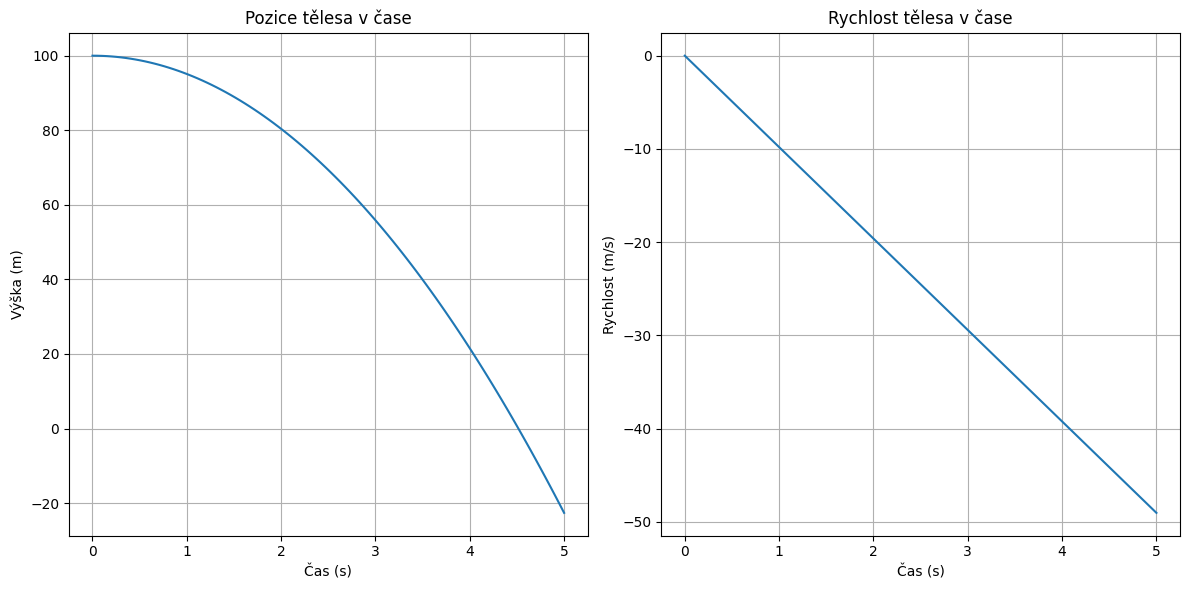

Doba dopadu: 4.52 sekund
Rychlost při dopadu: 44.29 m/s


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Funkce pro výpočet dráhy volného pádu tělesa
def free_fall(t, state):
    # state[0] = pozice, state[1] = rychlost
    g = 9.81  # gravitační zrychlení v m/s^2
    
    # Newtonův zákon: a = F/m, kde F = m*g pro gravitaci
    # Jelikož m se vyskytuje na obou stranách rovnice, zjednodušuje se na a = g
    dpos_dt = state[1]  # změna pozice = rychlost
    dvel_dt = -g        # změna rychlosti = zrychlení (záporné, protože směřuje dolů)
    
    return [dpos_dt, dvel_dt]

# Počáteční podmínky: výška 100 metrů, počáteční rychlost 0
initial_state = [100.0, 0.0]
t_span = (0, 5)  # Časový rozsah 0-5 sekund
t_eval = np.linspace(0, 5, 100)  # Body pro vyhodnocení

# Řešení diferenciální rovnice
solution = solve_ivp(free_fall, t_span, initial_state, t_eval=t_eval)

# Vykreslení výsledků
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(solution.t, solution.y[0])
plt.grid(True)
plt.xlabel('Čas (s)')
plt.ylabel('Výška (m)')
plt.title('Pozice tělesa v čase')

plt.subplot(1, 2, 2)
plt.plot(solution.t, solution.y[1])
plt.grid(True)
plt.xlabel('Čas (s)')
plt.ylabel('Rychlost (m/s)')
plt.title('Rychlost tělesa v čase')

plt.tight_layout()
plt.show()

# Výpočet doby dopadu
impact_time = np.sqrt(2 * initial_state[0] / 9.81)
impact_velocity = -9.81 * impact_time

print(f"Doba dopadu: {impact_time:.2f} sekund")
print(f"Rychlost při dopadu: {abs(impact_velocity):.2f} m/s")


### 1.2 Model počasí - Lorenzovy rovnice

Lorenzovy rovnice jsou soustava tří obyčejných diferenciálních rovnic, které Edward Lorenz odvodil jako zjednodušený model atmosférické konvekce. Tento model demonstruje chaotické chování, kde malé změny v počátečních podmínkách mohou vést k velmi odlišným výsledkům - jev známý jako "efekt motýlích křídel".

Lorenzovy rovnice mají tvar:

$$\frac{dx}{dt} = \sigma(y - x)$$
$$\frac{dy}{dt} = x(\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

kde $\sigma$, $\rho$ a $\beta$ jsou systémové parametry.



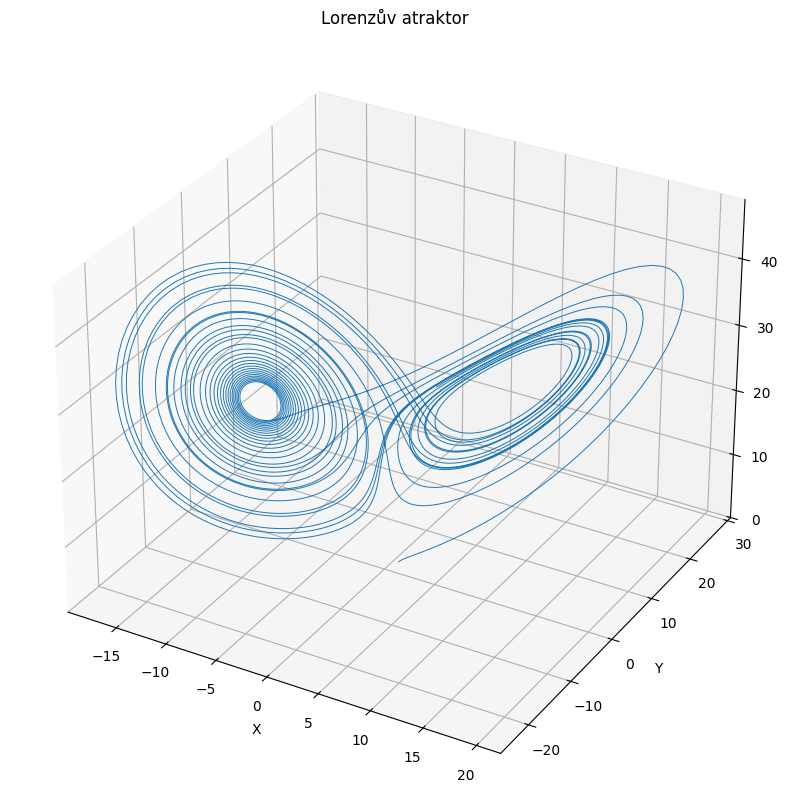

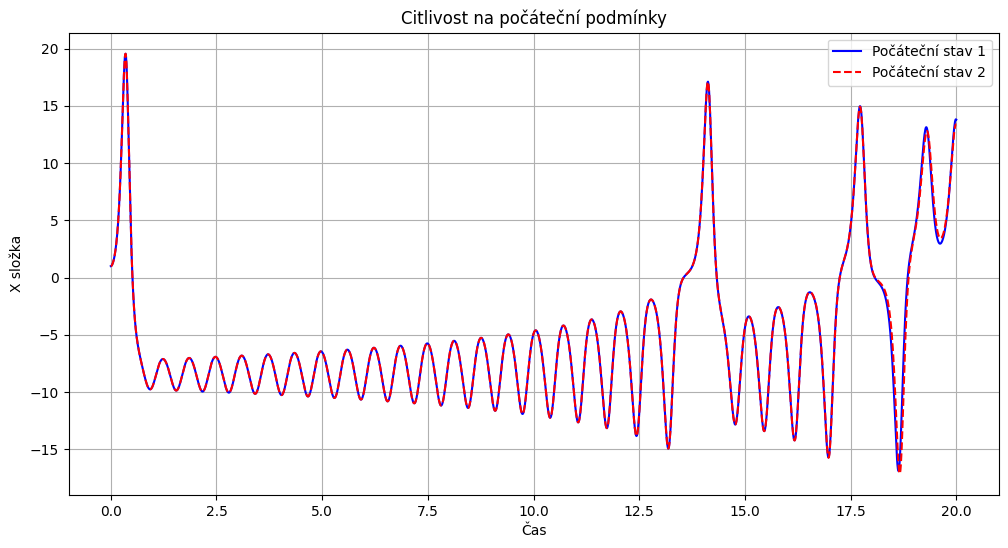

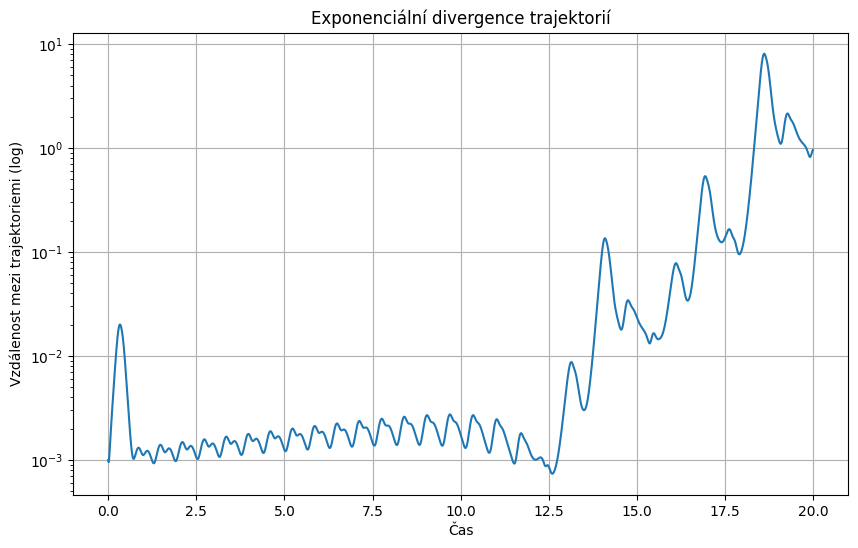

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Definice Lorenzova modelu
def lorenz(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Počáteční podmínky
initial_state = [1.0, 1.0, 1.0]
t_span = (0, 30)
t_eval = np.linspace(0, 30, 5000)

# Řešení rovnic
solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval, rtol=1e-10, atol=1e-10)

# Vykreslení traektorie ve 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(solution.y[0], solution.y[1], solution.y[2], lw=0.7)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenzův atraktor')

# Demonstrace citlivosti na počáteční podmínky
initial_state1 = [1.0, 1.0, 1.0]
initial_state2 = [1.001, 1.0, 1.0]  # Nepatrná změna v první složce

t_span = (0, 20)
t_eval = np.linspace(0, 20, 2000)

solution1 = solve_ivp(lorenz, t_span, initial_state1, t_eval=t_eval, rtol=1e-10, atol=1e-10)
solution2 = solve_ivp(lorenz, t_span, initial_state2, t_eval=t_eval, rtol=1e-10, atol=1e-10)

plt.figure(figsize=(12, 6))
plt.plot(solution1.t, solution1.y[0], 'b-', label='Počáteční stav 1')
plt.plot(solution2.t, solution2.y[0], 'r--', label='Počáteční stav 2')
plt.grid(True)
plt.xlabel('Čas')
plt.ylabel('X složka')
plt.title('Citlivost na počáteční podmínky')
plt.legend()
plt.show()

# Výpočet divergence trajektorií v čase
distances = np.sqrt(np.sum((solution1.y - solution2.y)**2, axis=0))

plt.figure(figsize=(10, 6))
plt.semilogy(solution1.t, distances)
plt.grid(True)
plt.xlabel('Čas')
plt.ylabel('Vzdálenost mezi trajektoriemi (log)')
plt.title('Exponenciální divergence trajektorií')
plt.show()

### 1.3 Kompromis mezi jednoduchostí a přesností modelu

Při vytváření matematických modelů vždy stojíme před volbou mezi jednoduchostí modelu a jeho přesností. Jednodušší modely jsou snáze pochopitelné a výpočetně efektivnější, zatímco složitější modely mohou přesněji zachycovat realitu, ale za cenu větší výpočetní náročnosti a složitější interpretace.

**Příklad: Model pohybu kyvadla**

Pro kyvadlo můžeme vytvořit modely různé složitosti:

1. **Jednoduchý model**: Aproximace pro malé výchylky ($\sin \theta \approx \theta$)
2. **Přesnější model**: Nelineární model s přesným $\sin \theta$
3. **Ještě přesnější model**: Zahrnutí tření, odporu vzduchu, nehmotného závěsu, atd.

Z tohoto příkladu je zřejmé, že pro velké výchylky kyvadla je jednoduchý lineární model nepřesný. Nelineární model lépe odpovídá reálnému chování, zatímco model zahrnující tření nejlépe popisuje skutečné kyvadlo.



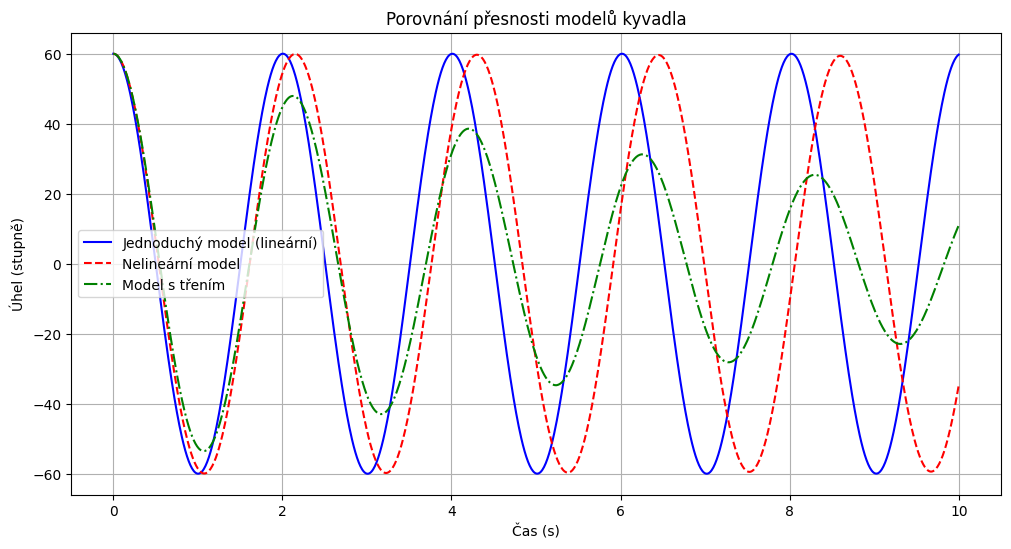

Průměrná absolutní odchylka mezi lineárním a nelineárním modelem: 0.6481 radiánů


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Konstanty
g = 9.81  # gravitační zrychlení (m/s^2)
L = 1.0   # délka kyvadla (m)

# 1. Jednoduchý lineární model (pro malé výchylky)
def simple_pendulum(t, state):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -(g/L) * theta  # Aproximace sin(theta) ≈ theta
    return [dtheta_dt, domega_dt]

# 2. Přesnější nelineární model
def nonlinear_pendulum(t, state):
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)  # Přesný sin(theta)
    return [dtheta_dt, domega_dt]

# 3. Model s třením
def pendulum_with_friction(t, state):
    theta, omega = state
    b = 0.2  # koeficient tření
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta) - b * omega
    return [dtheta_dt, domega_dt]

# Počáteční podmínky - velká výchylka 60 stupňů (1.05 radiánů)
initial_state = [np.radians(60), 0.0]
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Řešení pro všechny tři modely
solution_simple = solve_ivp(simple_pendulum, t_span, initial_state, t_eval=t_eval)
solution_nonlinear = solve_ivp(nonlinear_pendulum, t_span, initial_state, t_eval=t_eval)
solution_friction = solve_ivp(pendulum_with_friction, t_span, initial_state, t_eval=t_eval)

# Vykreslení výsledků
plt.figure(figsize=(12, 6))
plt.plot(solution_simple.t, np.degrees(solution_simple.y[0]), 'b-', label='Jednoduchý model (lineární)')
plt.plot(solution_nonlinear.t, np.degrees(solution_nonlinear.y[0]), 'r--', label='Nelineární model')
plt.plot(solution_friction.t, np.degrees(solution_friction.y[0]), 'g-.', label='Model s třením')
plt.grid(True)
plt.xlabel('Čas (s)')
plt.ylabel('Úhel (stupně)')
plt.title('Porovnání přesnosti modelů kyvadla')
plt.legend()
plt.show()

# Výpočet odchylek
mean_diff = np.mean(np.abs(solution_simple.y[0] - solution_nonlinear.y[0]))
print(f"Průměrná absolutní odchylka mezi lineárním a nelineárním modelem: {mean_diff:.4f} radiánů")


### 2.1 Variační principy ve fyzice

Mnoho fyzikálních zákonů lze formulovat pomocí variačních principů – princip nejmenší akce, princip minimální energie, atd. Tyto principy říkají, že příroda "vybírá" takové cesty nebo stavy, které minimalizují (nebo maximalizují) určitou veličinu.

Jedním z nejznámějších variačních principů je **Hamiltonův princip nejmenší akce**. Podle tohoto principu se systém pohybuje po takové trajektorii, která minimalizuje veličinu zvanou akce.

Akce je definována jako:

$$S = \int_{t_1}^{t_2} L(q, \dot{q}, t) \, dt$$

kde $L$ je Lagrangián systému, obvykle definovaný jako $L = T - V$, kde $T$ je kinetická energie a $V$ je potenciální energie.

Podívejme se na příklad nejkratší dráhy světla (princip Fermatova principu nejmenšího času): 
Tento příklad demonstruje princip nejmenšího času (Fermatův princip), který říká, že světlo se pohybuje po takové dráze, která minimalizuje čas cesty mezi dvěma body. Tento princip vede k Snellovu zákonu lomu světla.



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Simulace lomu světla na rozhraní dvou prostředí podle Snellova zákona

# Rychlosti světla v různých prostředích
v1 = 3.0e8  # rychlost světla ve vzduchu (m/s)
v2 = 2.25e8  # rychlost světla ve vodě (m/s)

# Pozice zdroje a cíle
source = np.array([-5.0, 2.0])
target = np.array([5.0, -3.0])
y_boundary = 0.0  # hranice mezi prostředími (y=0)

# Funkce pro výpočet času cesty světelného paprsku
def travel_time(x_crossing):
    # Bod průchodu rozhraním
    crossing_point = np.array([x_crossing, y_boundary])
    
    # Vzdálenosti v jednotlivých prostředích
    d1 = np.linalg.norm(crossing_point - source)
    d2 = np.linalg.norm(target - crossing_point)
    
    # Čas cesty v každém prostředí
    t1 = d1 / v1
    t2 = d2 / v2
    
    # Celkový čas cesty
    return t1 + t2

# Nalezení optimální cesty minimalizací času
result = minimize(travel_time, 0.0)
x_optimal = result.x[0]

# Výpočet úhlů dopadu a lomu
crossing_point = np.array([x_optimal, y_boundary])
v_incident = crossing_point - source
v_refracted = target - crossing_point

theta1 = np.arccos(np.abs(v_incident[1]) / np.linalg.norm(v_incident))
theta2 = np.arccos(np.abs(v_refracted[1]) / np.linalg.norm(v_refracted))

# Ověření Snellova zákona
sin_theta1 = np.sin(theta1)
sin_theta2 = np.sin(theta2)
n1 = 1.0  # index lomu vzduchu
n2 = 1.33  # index lomu vody

# Vykreslení výsledků
plt.figure(figsize=(10, 8))

# Nakreslení rozhraní prostředí
plt.axhline(y=y_boundary, color='k', linestyle='-', alpha=0.3)
plt.fill_between([-10, 10], -5, y_boundary, color='skyblue', alpha=0.2, label='Voda (n=1.33)')
plt.fill_between([-10, 10], y_boundary, 5, color='lightyellow', alpha=0.2, label='Vzduch (n=1.0)')

# Nakreslení optimální cesty
plt.plot([source[0], x_optimal, target[0]], [source[1], y_boundary, target[1]], 'r-', lw=2, label='Optimální cesta')

# Pro srovnání - přímá cesta (neoptimální)
plt.plot([source[0], target[0]], [source[1], target[1]], 'g--', label='Přímá cesta')

# Označení zdroje a cíle
plt.plot(source[0], source[1], 'bo', markersize=10, label='Zdroj')
plt.plot(target[0], target[1], 'go', markersize=10, label='Cíl')
plt.plot(x_optimal, y_boundary, 'ro', markersize=5)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fermatův princip nejmenšího času - lom světla')
plt.legend()
plt.axis('equal')
plt.xlim(-7, 7)
plt.ylim(-4, 4)

# Informace o výsledcích
print(f"Optimální bod průchodu: x = {x_optimal:.3f}")
print(f"Čas optimální cesty: {travel_time(x_optimal)*1e9:.3f} ns")
print(f"Čas přímé cesty: {travel_time((source[0] + target[0])/2)*1e9:.3f} ns")
print(f"Úhel dopadu: {np.degrees(theta1):.2f}°")
print(f"Úhel lomu: {np.degrees(theta2):.2f}°")
print(f"sin(θ1)/sin(θ2) = {sin_theta1/sin_theta2:.3f}")
print(f"n2/n1 = {n2/n1:.3f}")

plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## 3. Analytické metody optimalizace

### 3.1 Základy diferenciálního počtu

Diferenciální počet je jedním z hlavních nástrojů pro řešení optimalizačních úloh. Umožňuje nám analyzovat, jak se funkce mění, a najít body, kde funkce dosahuje extrémů (maxim nebo minim).

### 3.2 Derivace a její význam pro hledání extrémů

Derivace funkce $f(x)$ v bodě $x$ udává směrnici tečny ke grafu funkce v tomto bodě. Z hlediska optimalizace je důležité, že v bodech lokálních extrémů je derivace funkce rovna nule:

$$f'(x) = 0$$

Pro ověření, zda jde o minimum nebo maximum, používáme druhou derivaci:
- Pokud $f''(x) > 0$, jedná se o lokální minimum
- Pokud $f''(x) < 0$, jedná se o lokální maximum

### 3.3 Příklad na mocninné funkce



Funkce f(x) = x**4 - 4*x**2 + 2
První derivace f'(x) = 4*x**3 - 8*x
Druhá derivace f''(x) = 12*x**2 - 8

Kritické body (f'(x) = 0):
x = 0.0000, f(0.0000) = 2.0000, f''(0.0000) = -8.0000 -> maximum
x = -1.4142, f(-1.4142) = -2.0000, f''(-1.4142) = 16.0000 -> minimum
x = 1.4142, f(1.4142) = -2.0000, f''(1.4142) = 16.0000 -> minimum


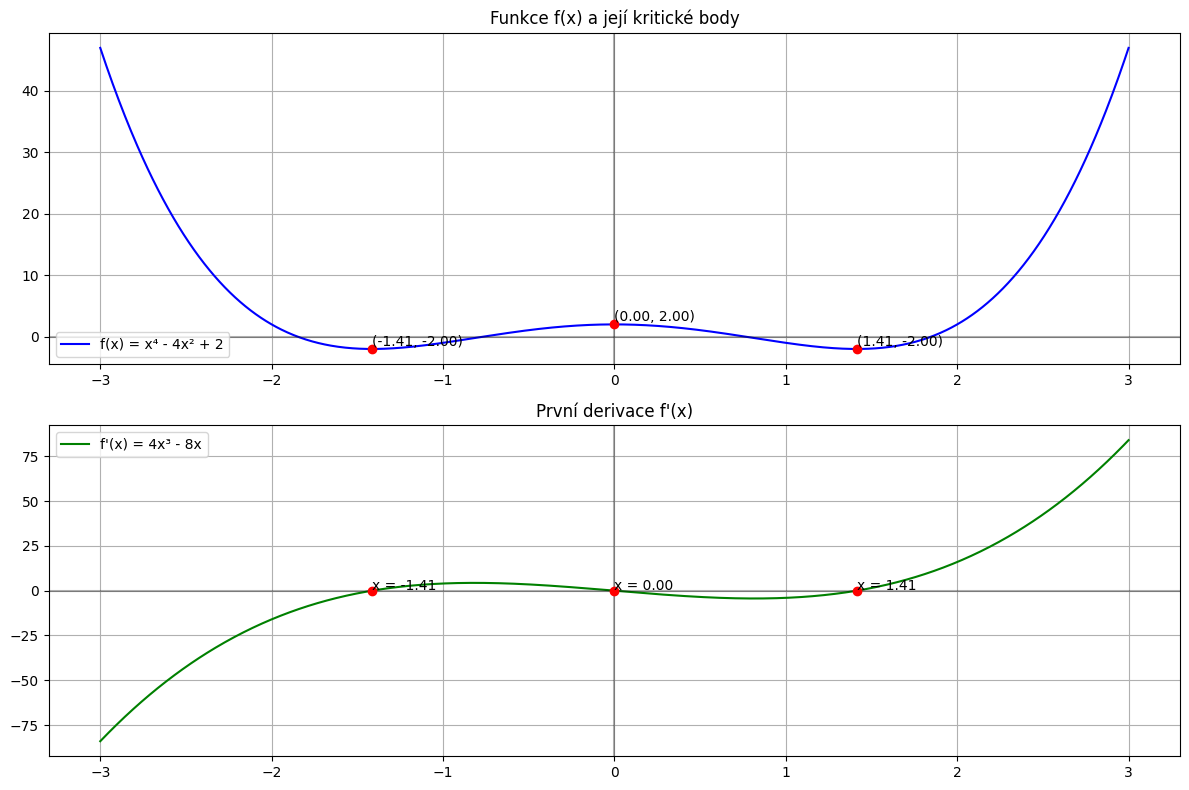

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definice symbolu pro symbolické výpočty
x = sp.Symbol('x')

# Definice funkce
def f(x_val):
    return x_val**4 - 4*x_val**2 + 2

# Symbolická derivace
f_symbolic = x**4 - 4*x**2 + 2
f_prime = sp.diff(f_symbolic, x)
f_double_prime = sp.diff(f_prime, x)

print("Funkce f(x) =", f_symbolic)
print("První derivace f'(x) =", f_prime)
print("Druhá derivace f''(x) =", f_double_prime)

# Hledání kritických bodů (f'(x) = 0)
critical_points = sp.solve(f_prime, x)
print("\nKritické body (f'(x) = 0):")
for point in critical_points:
    point_val = float(point)
    second_deriv = float(f_double_prime.subs(x, point))
    extremum_type = "minimum" if second_deriv > 0 else "maximum"
    print(f"x = {point_val:.4f}, f({point_val:.4f}) = {f(point_val):.4f}, f''({point_val:.4f}) = {second_deriv:.4f} -> {extremum_type}")

# Vizualizace funkce a jejích derivací
x_vals = np.linspace(-3, 3, 1000)
y_vals = [f(x_val) for x_val in x_vals]
y_prime = [float(f_prime.subs(x, x_val)) for x_val in x_vals]

plt.figure(figsize=(12, 8))

# Graf funkce
plt.subplot(2, 1, 1)
plt.plot(x_vals, y_vals, 'b-', label='f(x) = x⁴ - 4x² + 2')
plt.grid(True)
plt.title('Funkce f(x) a její kritické body')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Označení kritických bodů
for point in critical_points:
    point_val = float(point)
    plt.plot(point_val, f(point_val), 'ro')
    plt.text(point_val, f(point_val) + 0.5, f'({point_val:.2f}, {f(point_val):.2f})')

plt.legend()

# Graf derivace
plt.subplot(2, 1, 2)
plt.plot(x_vals, y_prime, 'g-', label="f'(x) = 4x³ - 8x")
plt.grid(True)
plt.title('První derivace f\'(x)')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Označení nulových bodů derivace
for point in critical_points:
    point_val = float(point)
    plt.plot(point_val, 0, 'ro')
    plt.text(point_val, 0.5, f'x = {point_val:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

### 3.4 Rovnovážné stavy mechanických systémů

Rovnovážné stavy fyzikálních systémů často odpovídají minimům potenciální energie. Uvažujme jednoduchý příklad kuličky v gravitačním poli s nerovným povrchem.


Tento příklad demonstruje, jak rovnovážné stavy fyzikálních systémů odpovídají bodům s nulovou silou (F = -∇V = 0), což jsou zároveň body, kde první derivace potenciální energie je nulová. Stabilní rovnovážné stavy odpovídají lokálním minimům potenciální energie.


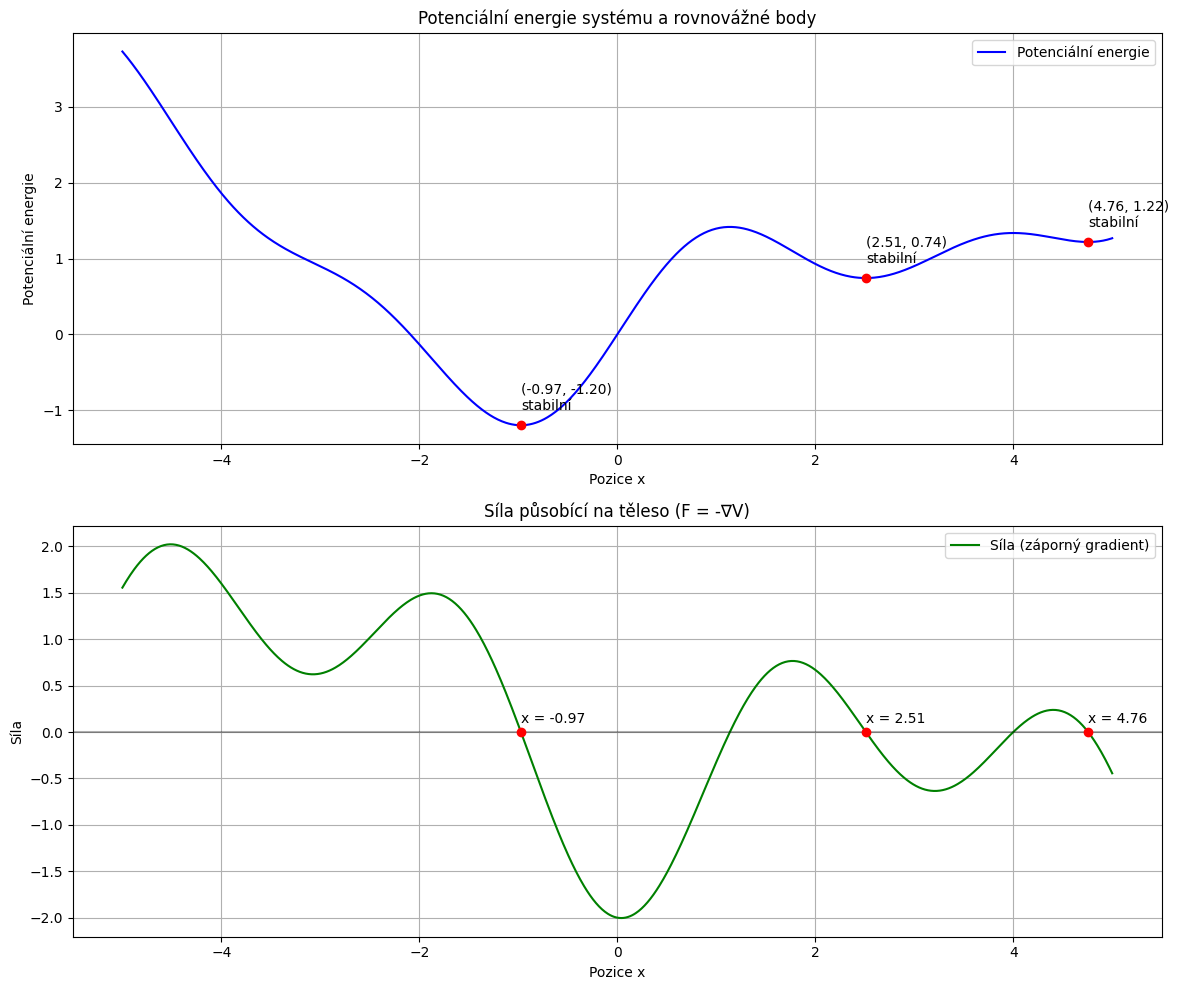

Nalezené rovnovážné body:
Bod 1: x = -0.9736, E = -1.1971, stabilita: stabilní
Bod 2: x = 2.5115, E = 0.7439, stabilita: stabilní
Bod 3: x = 4.7570, E = 1.2193, stabilita: stabilní


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definice povrchu (potenciální energie)
def potential_energy(x):
    return np.sin(x) + 0.5 * np.sin(2*x) + 0.1 * x**2

# Derivace potenciální energie (síla)
def force(x):
    return -(np.cos(x) + np.cos(2*x) + 0.2 * x)

# Rozsah hodnot x pro vizualizaci
x_vals = np.linspace(-5, 5, 1000)
y_vals = potential_energy(x_vals)
force_vals = force(x_vals)

# Hledání lokálních minim (rovnovážných bodů)
results = []
for x0 in np.linspace(-5, 5, 10):
    result = minimize(potential_energy, x0)
    if result.success:
        # Zaokrouhlení pro odstranění duplicit
        x_min = round(result.x[0], 4)
        if not any(abs(x_min - r[0]) < 1e-3 for r in results):
            results.append((x_min, potential_energy(x_min), result.hess_inv[0][0]))

# Seřazení výsledků podle hodnoty x
results.sort()

# Vykreslení povrchu a rovnovážných bodů
plt.figure(figsize=(12, 10))

# Graf potenciální energie
plt.subplot(2, 1, 1)
plt.plot(x_vals, y_vals, 'b-', label='Potenciální energie')
plt.grid(True)
plt.xlabel('Pozice x')
plt.ylabel('Potenciální energie')
plt.title('Potenciální energie systému a rovnovážné body')

# Označení lokálních minim
for x_min, pe_min, hess in results:
    stability = "stabilní" if hess > 0 else "nestabilní"
    plt.plot(x_min, pe_min, 'ro')
    plt.text(x_min, pe_min + 0.2, f'({x_min:.2f}, {pe_min:.2f})\n{stability}')

plt.legend()

# Graf síly
plt.subplot(2, 1, 2)
plt.plot(x_vals, force_vals, 'g-', label='Síla (záporný gradient)')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Pozice x')
plt.ylabel('Síla')
plt.title('Síla působící na těleso (F = -∇V)')

# Označení bodů s nulovou silou
for x_min, _, _ in results:
    plt.plot(x_min, 0, 'ro')
    plt.text(x_min, 0.1, f'x = {x_min:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

# Výpis nalezených rovnovážných bodů
print("Nalezené rovnovážné body:")
for i, (x_min, pe_min, hess) in enumerate(results):
    stability = "stabilní" if hess > 0 else "nestabilní"
    print(f"Bod {i+1}: x = {x_min:.4f}, E = {pe_min:.4f}, stabilita: {stability}")

## 4. Numerické metody optimalizace

Mnoho optimalizačních problémů nelze řešit analyticky, proto potřebujeme numerické metody.

### 4.1 Newtonova metoda


Počáteční odhad x₀ = -2.0:
  Nalezený kořen: x = -1.581139
  Hodnota derivace v kořenu: f'(x) = -1.776357e-15
  Počet iterací: 5
  Hodnota funkce v kritickém bodě: f(x) = -2.250000
  Druhá derivace v kritickém bodě: f''(x) = 20.000000
  Typ kritického bodu: minimum

Počáteční odhad x₀ = 0.0:
  Nalezený kořen: x = 0.000000
  Hodnota derivace v kořenu: f'(x) = 0.000000e+00
  Počet iterací: 1
  Hodnota funkce v kritickém bodě: f(x) = 4.000000
  Druhá derivace v kritickém bodě: f''(x) = -10.000000
  Typ kritického bodu: maximum

Počáteční odhad x₀ = 1.5:
  Nalezený kořen: x = 1.581139
  Hodnota derivace v kořenu: f'(x) = -1.776357e-15
  Počet iterací: 4
  Hodnota funkce v kritickém bodě: f(x) = -2.250000
  Druhá derivace v kritickém bodě: f''(x) = 20.000000
  Typ kritického bodu: minimum



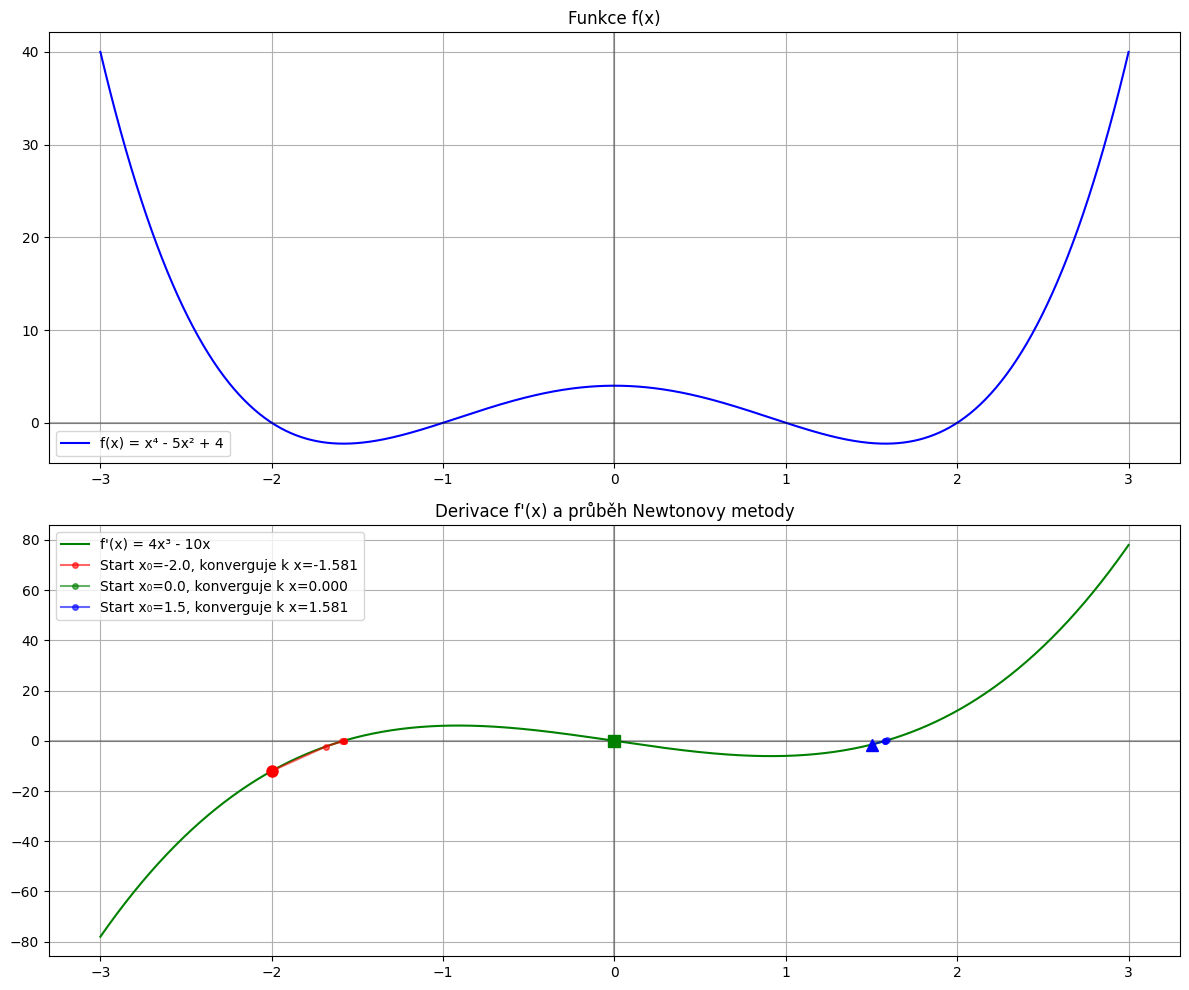

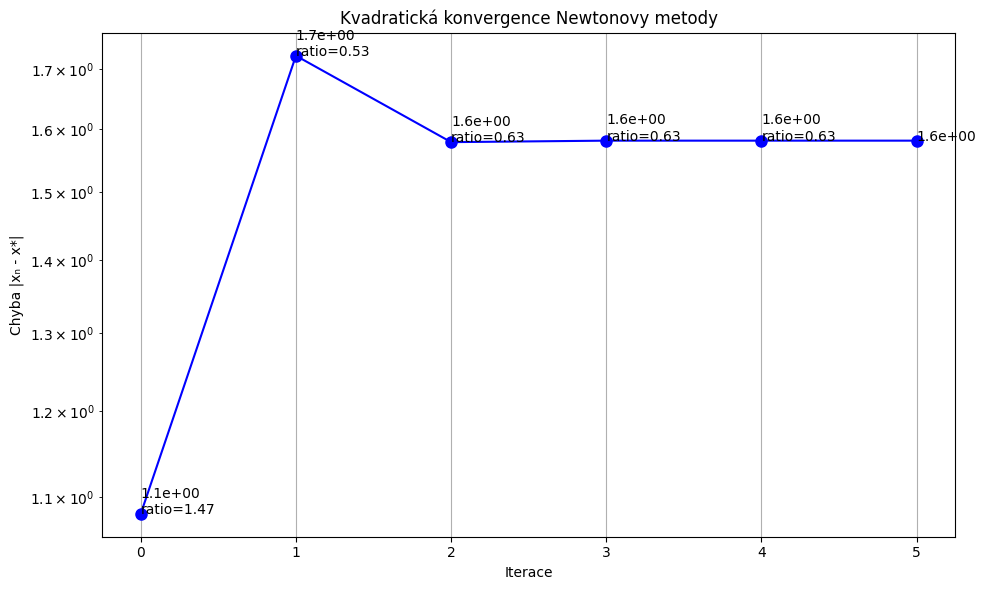

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definice funkce a jejích derivací
def f(x):
    return x**4 - 5*x**2 + 4

def df(x):
    return 4*x**3 - 10*x

def ddf(x):
    return 12*x**2 - 10

# Implementace Newtonovy metody
def newton_method(f, df, x0, tol=1e-6, max_iter=100):
    """
    Newtonova metoda pro hledání kořenů rovnice f(x) = 0
    
    Parametry:
    f -- funkce, jejíž kořen hledáme
    df -- derivace funkce f
    x0 -- počáteční odhad
    tol -- tolerance pro ukončení (přesnost)
    max_iter -- maximální počet iterací
    
    Vrací:
    x -- nalezený kořen
    iterations -- počet provedených iterací
    history -- historie hodnot x v jednotlivých iteracích
    """
    x = x0
    iterations = 0
    history = [x0]
    
    for i in range(max_iter):
        f_val = f(x)
        df_val = df(x)
        
        # Kontrola, zda derivace není blízká nule (což by vedlo k dělení téměř nulou)
        if abs(df_val) < 1e-10:
            print(f"Derivace je blízká nule v iteraci {i}, ukončuji.")
            break
        
        # Newtonův krok: x_{n+1} = x_n - f(x_n) / f'(x_n)
        x_new = x - f_val / df_val
        history.append(x_new)
        
        # Kontrola konvergence
        if abs(x_new - x) < tol:
            x = x_new
            iterations = i + 1
            break
        
        x = x_new
        iterations = i + 1
    
    return x, iterations, history

# Příklad použití Newtonovy metody pro hledání kořenů derivace funkce f
# (což jsou kritické body původní funkce, kde df(x) = 0)
x0_values = [-2.0, 0.0, 1.5]  # Různé počáteční odhady

# Vytvoření grafu funkce a její derivace
x_vals = np.linspace(-3, 3, 1000)
y_vals = [f(x) for x in x_vals]
dy_vals = [df(x) for x in x_vals]

plt.figure(figsize=(12, 10))

# Graf funkce
plt.subplot(2, 1, 1)
plt.plot(x_vals, y_vals, 'b-', label='f(x) = x⁴ - 5x² + 4')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Funkce f(x)')
plt.legend()

# Graf derivace s vyznačením kořenů
plt.subplot(2, 1, 2)
plt.plot(x_vals, dy_vals, 'g-', label="f'(x) = 4x³ - 10x")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Derivace f\'(x) a průběh Newtonovy metody')
plt.legend()

# Aplikace Newtonovy metody s různými počátečními odhady
colors = ['r', 'g', 'b']
markers = ['o', 's', '^']

for i, x0 in enumerate(x0_values):
    root, iterations, history = newton_method(df, ddf, x0)
    
    # Vykreslení průběhu Newtonovy metody
    plt.subplot(2, 1, 2)
    plt.plot(history, [df(x) for x in history], f'{colors[i]}o-', markersize=4, alpha=0.6, 
             label=f'Start x₀={x0:.1f}, konverguje k x={root:.3f}')
    
    # Označení počátečního bodu
    plt.plot(x0, df(x0), f'{colors[i]}{markers[i]}', markersize=8)
    
    print(f"Počáteční odhad x₀ = {x0:.1f}:")
    print(f"  Nalezený kořen: x = {root:.6f}")
    print(f"  Hodnota derivace v kořenu: f'(x) = {df(root):.6e}")
    print(f"  Počet iterací: {iterations}")
    print(f"  Hodnota funkce v kritickém bodě: f(x) = {f(root):.6f}")
    print(f"  Druhá derivace v kritickém bodě: f''(x) = {ddf(root):.6f}")
    print(f"  Typ kritického bodu: {'minimum' if ddf(root) > 0 else 'maximum'}")
    print()

plt.legend()
plt.tight_layout()
plt.show()

# Demonstrace kvadratické konvergence Newtonovy metody
x0 = 0.5  # Počáteční odhad blízko kořene
root, iterations, history = newton_method(df, ddf, x0, tol=1e-14, max_iter=10)

# Výpočet chyby v každé iteraci
true_root = np.sqrt(5/2)  # Analytické řešení pro sqrt(5/2)
errors = [abs(x - true_root) for x in history]

plt.figure(figsize=(10, 6))
plt.semilogy(range(len(errors)), errors, 'bo-', markersize=8)
plt.grid(True)
plt.xlabel('Iterace')
plt.ylabel('Chyba |xₙ - x*|')
plt.title('Kvadratická konvergence Newtonovy metody')

# Zobrazení hodnot chyb pro jednotlivé iterace
for i, err in enumerate(errors):
    if i < len(errors) - 1:
        ratio = errors[i+1] / errors[i]**2 if errors[i] > 0 else 0
        plt.text(i, err, f'{err:.1e}\nratio={ratio:.2f}')
    else:
        plt.text(i, err, f'{err:.1e}')

plt.tight_layout()
plt.show()




### 4.2 Aplikace Newtonovy metody na kvadratickou funkci

Pro kvadratickou funkci by Newtonova metoda měla najít řešení v jednom kroku, protože druhá derivace je konstantní.


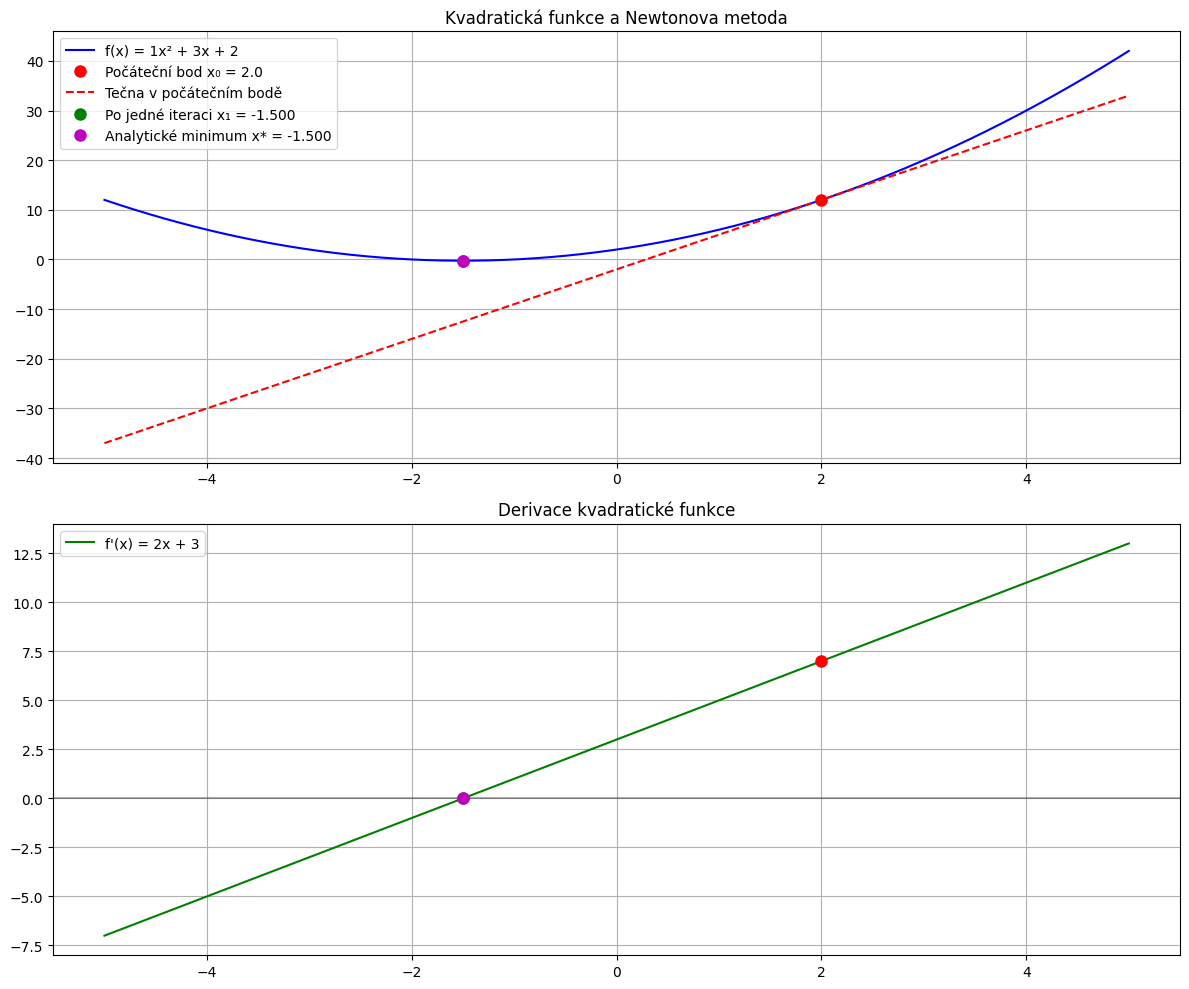

Počáteční bod: x₀ = 2.0, f(x₀) = 12.0000, f'(x₀) = 7.0000
Po jedné iteraci: x₁ = -1.500000, f(x₁) = -0.250000, f'(x₁) = 0.000000e+00
Analytické minimum: x* = -1.500000, f(x*) = -0.250000
Chyba po jedné iteraci: |x₁ - x*| = 0.000000e+00


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definice kvadratické funkce a jejích derivací
def quadratic(x, a=1, b=3, c=2):
    return a*x**2 + b*x + c

def dquadratic(x, a=1, b=3):
    return 2*a*x + b

def ddquadratic(x, a=1):
    return 2*a

# Aplikace Newtonovy metody na kvadratickou funkci
x0 = 2.0  # Počáteční bod
a, b, c = 1, 3, 2  # Koeficienty kvadratické funkce

# Analytické řešení minima kvadratické funkce
x_min_analytical = -b/(2*a)
y_min_analytical = quadratic(x_min_analytical, a, b, c)

# Jeden krok Newtonovy metody
x1 = x0 - dquadratic(x0, a, b) / ddquadratic(x0, a)
y1 = quadratic(x1, a, b, c)

# Vykreslení kvadratické funkce
x_vals = np.linspace(-5, 5, 1000)
y_vals = [quadratic(x, a, b, c) for x in x_vals]
dy_vals = [dquadratic(x, a, b) for x in x_vals]

plt.figure(figsize=(12, 10))

# Graf kvadratické funkce
plt.subplot(2, 1, 1)
plt.plot(x_vals, y_vals, 'b-', label=f'f(x) = {a}x² + {b}x + {c}')
plt.grid(True)
plt.title('Kvadratická funkce a Newtonova metoda')

# Označení počátečního bodu
plt.plot(x0, quadratic(x0, a, b, c), 'ro', markersize=8, label=f'Počáteční bod x₀ = {x0}')

# Tečna v počátečním bodě
tangent_y = lambda x: quadratic(x0, a, b, c) + dquadratic(x0, a, b) * (x - x0)
plt.plot(x_vals, [tangent_y(x) for x in x_vals], 'r--', label='Tečna v počátečním bodě')

# Označení bodu po jedné iteraci
plt.plot(x1, y1, 'go', markersize=8, label=f'Po jedné iteraci x₁ = {x1:.3f}')

# Označení analytického minima
plt.plot(x_min_analytical, y_min_analytical, 'mo', markersize=8, 
         label=f'Analytické minimum x* = {x_min_analytical:.3f}')

plt.legend()

# Graf derivace
plt.subplot(2, 1, 2)
plt.plot(x_vals, dy_vals, 'g-', label=f"f'(x) = {2*a}x + {b}")
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Derivace kvadratické funkce')

# Označení bodů
plt.plot(x0, dquadratic(x0, a, b), 'ro', markersize=8)
plt.plot(x1, dquadratic(x1, a, b), 'go', markersize=8)
plt.plot(x_min_analytical, dquadratic(x_min_analytical, a, b), 'mo', markersize=8)

plt.legend()
plt.tight_layout()
plt.show()

# Výpis výsledků
print(f"Počáteční bod: x₀ = {x0}, f(x₀) = {quadratic(x0, a, b, c):.4f}, f'(x₀) = {dquadratic(x0, a, b):.4f}")
print(f"Po jedné iteraci: x₁ = {x1:.6f}, f(x₁) = {y1:.6f}, f'(x₁) = {dquadratic(x1, a, b):.6e}")
print(f"Analytické minimum: x* = {x_min_analytical:.6f}, f(x*) = {y_min_analytical:.6f}")
print(f"Chyba po jedné iteraci: |x₁ - x*| = {abs(x1 - x_min_analytical):.6e}")

### 4.3 Konvergence a omezení Newtonovy metody

Newtonova metoda má kvadratickou konvergenci v blízkosti řešení, ale může selhat v některých případech:
- Pokud je derivace funkce v iteračním bodě blízká nule
- Pokud má funkce inflexní bod v místě, kde je derivace nulová
- Pokud je počáteční bod příliš daleko od řešení

Podívejme se na případ, kdy Newtonova metoda nekonverguje:


/tmp/ipykernel_6487/3890102614.py:9: RuntimeWarning: invalid value encountered in scalar power
  return (1/3) * x**(-2/3)  # Derivace kubického kořene


Počáteční bod x₀ = 0.5:
  Iterace 0: x = 0.500000, f(x) = 0.793701
  Iterace 1: x = -1.000000, f(x) = -1.000000
  Iterace 2: x = nan, f(x) = nan
  Iterace 3: x = nan, f(x) = nan
  Iterace 4: x = nan, f(x) = nan
  Iterace 5: x = nan, f(x) = nan
  Iterace 6: x = nan, f(x) = nan
  Iterace 7: x = nan, f(x) = nan
  Iterace 8: x = nan, f(x) = nan
  Iterace 9: x = nan, f(x) = nan
  Iterace 10: x = nan, f(x) = nan
Chyba při počátečním bodu x₀ = -0.5: ufunc 'cbrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Počáteční bod x₀ = 0.1:
  Iterace 0: x = 0.100000, f(x) = 0.464159
  Iterace 1: x = -0.200000, f(x) = -0.584804
  Iterace 2: x = nan, f(x) = nan
  Iterace 3: x = nan, f(x) = nan
  Iterace 4: x = nan, f(x) = nan
  Iterace 5: x = nan, f(x) = nan
  Iterace 6: x = nan, f(x) = nan
  Iterace 7: x = nan, f(x) = nan
  Iterace 8: x = nan, f(x) = nan
  Iterace 9: x = nan, f(x) = nan
  Iterace 10: x = nan, f

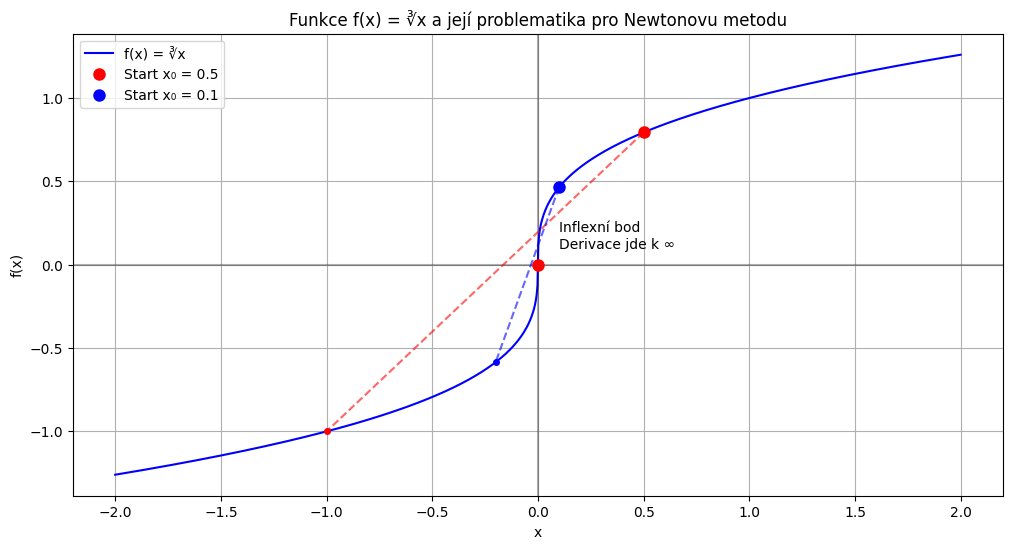

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definice problematické funkce a její derivace
def problematic_f(x):
    return np.cbrt(x)  # Kubický kořen (x^(1/3))

def problematic_df(x):
    return (1/3) * x**(-2/3)  # Derivace kubického kořene

# Vizualizace funkce a její derivace
x_vals = np.linspace(-2, 2, 1000)
y_vals = [problematic_f(x) for x in x_vals if x != 0]  # Vyhneme se dělení nulou

plt.figure(figsize=(12, 6))
plt.plot(x_vals, [problematic_f(x) for x in x_vals], 'b-', label='f(x) = ∛x')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Funkce f(x) = ∛x a její problematika pro Newtonovu metodu')
plt.xlabel('x')
plt.ylabel('f(x)')

# Označení inflexního bodu v x = 0
plt.plot(0, 0, 'ro', markersize=8)
plt.text(0.1, 0.1, 'Inflexní bod\nDerivace jde k ∞')

# Implementace Newtonovy metody s omezením počtu iterací
def newton_with_traj(f, df, x0, tol=1e-6, max_iter=10):
    x = x0
    history = [x0]
    
    for i in range(max_iter):
        f_val = f(x)
        df_val = df(x)
        
        # Ochrana proti dělení nulou nebo velmi malým číslem
        if abs(df_val) < 1e-10:
            print(f"Varování: Derivace je blízká nule v iteraci {i}, ukončuji.")
            break
        
        # Newtonův krok
        x_new = x - f_val / df_val
        history.append(x_new)
        
        # Kontrola konvergence
        if abs(x_new - x) < tol:
            break
        
        x = x_new
    
    return history

# Zkusíme Newtonovu metodu z různých počátečních bodů
start_points = [0.5, -0.5, 0.1, -0.1]
colors = ['r', 'g', 'b', 'm']

for i, x0 in enumerate(start_points):
    try:
        trajectory = newton_with_traj(problematic_f, problematic_df, x0)
        
        # Vykreslení trajektorie
        plt.plot([x0], [problematic_f(x0)], f'{colors[i]}o', markersize=8, 
                 label=f'Start x₀ = {x0}')
        
        # Spojnice bodů trajektorie
        x_traj = trajectory
        y_traj = [problematic_f(x) for x in trajectory]
        plt.plot(x_traj, y_traj, f'{colors[i]}--', alpha=0.6)
        
        # Vykreslení jednotlivých bodů trajektorie
        for j in range(1, len(trajectory)):
            plt.plot(trajectory[j], problematic_f(trajectory[j]), f'{colors[i]}o', markersize=4)
            
        print(f"Počáteční bod x₀ = {x0}:")
        for j, xj in enumerate(trajectory):
            print(f"  Iterace {j}: x = {xj:.6f}, f(x) = {problematic_f(xj):.6f}")
    except Exception as e:
        print(f"Chyba při počátečním bodu x₀ = {x0}: {e}")

plt.legend()
plt.show()

### 4.4 Gradientní metody

Gradientní metody jsou založeny na postupném klesání podél záporného gradientu funkce:

$$x_{k+1} = x_k - \alpha \nabla f(x_k)$$

kde $\alpha$ je velikost kroku (učící koeficient).



Analytické řešení minima: x* = -0.897598, y* = 0.682680
Hodnota funkce v minimu: f(x*, y*) = -1.921618


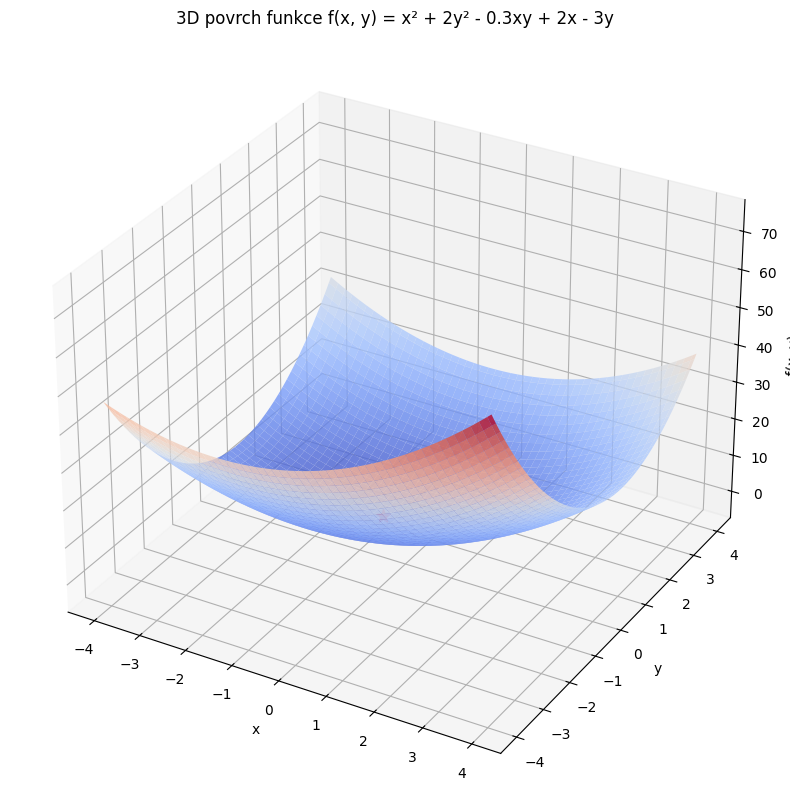

Start=[-3.0, 3.0], lr=0.05:
  Konečný bod: x = -0.897656, y = 0.682672
  Hodnota funkce: f(x, y) = -1.921618
  Chyba: ||x - x*|| = 5.912973e-05
  Počet iterací: 101
Start=[-3.0, 3.0], lr=0.1:
  Konečný bod: x = -0.897598, y = 0.682680
  Hodnota funkce: f(x, y) = -1.921618
  Chyba: ||x - x*|| = 4.213180e-07
  Počet iterací: 71
Start=[-3.0, 3.0], lr=0.2:
  Konečný bod: x = -0.897598, y = 0.682680
  Hodnota funkce: f(x, y) = -1.921618
  Chyba: ||x - x*|| = 3.633284e-07
  Počet iterací: 32
Start=[2.0, 2.0], lr=0.05:
  Konečný bod: x = -0.897495, y = 0.682695
  Hodnota funkce: f(x, y) = -1.921618
  Chyba: ||x - x*|| = 1.037095e-04
  Počet iterací: 101
Start=[2.0, 2.0], lr=0.1:
  Konečný bod: x = -0.897598, y = 0.682680
  Hodnota funkce: f(x, y) = -1.921618
  Chyba: ||x - x*|| = 4.781566e-07
  Počet iterací: 73
Start=[2.0, 2.0], lr=0.2:
  Konečný bod: x = -0.897598, y = 0.682680
  Hodnota funkce: f(x, y) = -1.921618
  Chyba: ||x - x*|| = 3.879637e-07
  Počet iterací: 33
Start=[0.0, -2.0], lr

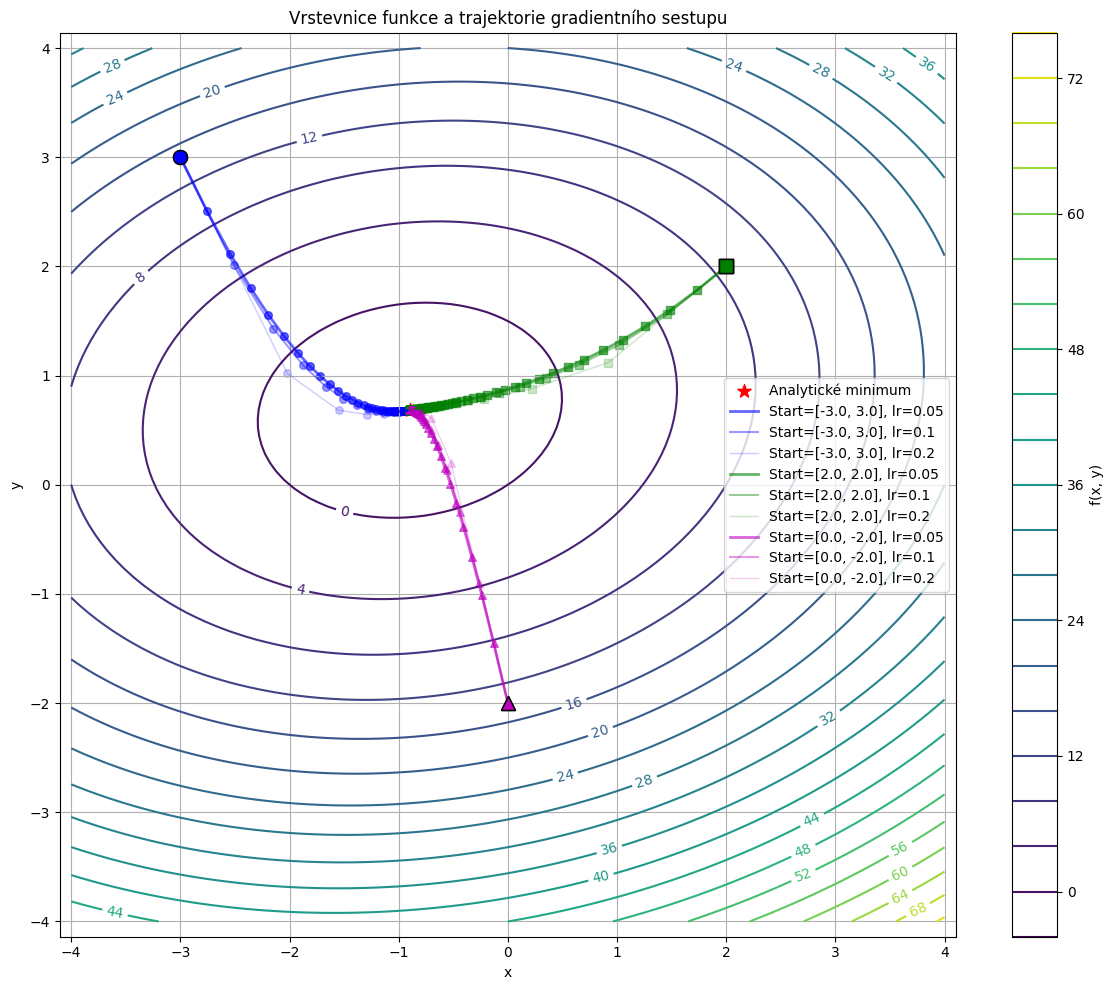

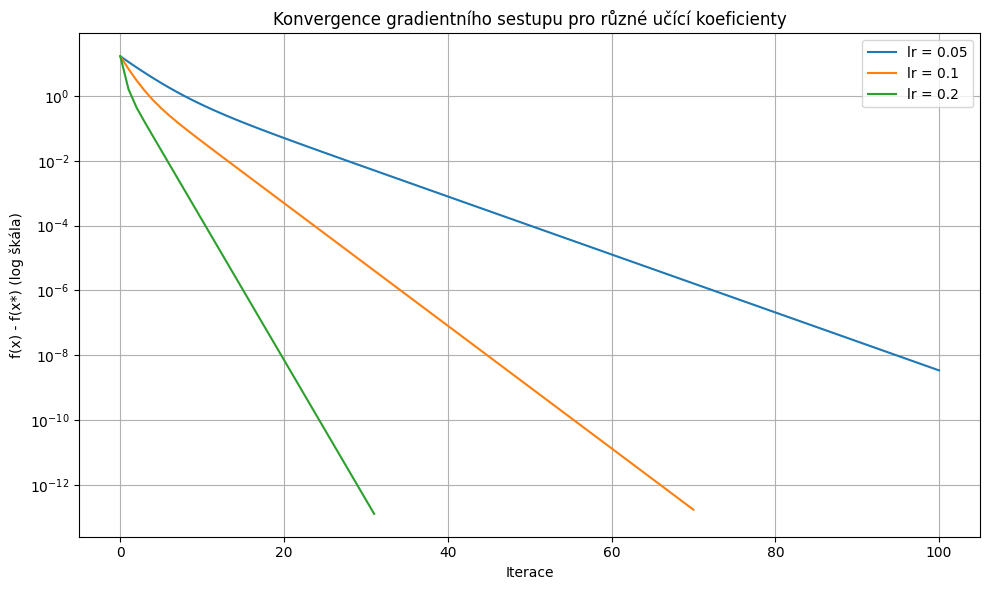

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Definice dvourozměrné funkce pro optimalizaci
def f(x, y):
    return x**2 + 2*y**2 - 0.3*x*y + 2*x - 3*y

# Gradient funkce f
def grad_f(x, y):
    df_dx = 2*x - 0.3*y + 2
    df_dy = 4*y - 0.3*x - 3
    return np.array([df_dx, df_dy])

# Implementace gradientního sestupu
def gradient_descent(grad_func, start, learning_rate=0.1, tol=1e-6, max_iter=100):
    """
    Implementace metody gradientního sestupu.
    
    Parametry:
    grad_func -- funkce pro výpočet gradientu
    start -- počáteční bod jako numpy array
    learning_rate -- velikost kroku (učící koeficient)
    tol -- tolerance pro ukončení
    max_iter -- maximální počet iterací
    
    Vrací:
    x_history -- historie bodů v průběhu optimalizace
    f_history -- historie hodnot funkce v průběhu optimalizace
    """
    x = np.array(start, dtype=float)
    x_history = [x.copy()]
    f_history = [f(x[0], x[1])]
    
    for i in range(max_iter):
        # Výpočet gradientu
        grad = grad_func(x[0], x[1])
        
        # Kontrola velikosti gradientu
        if np.linalg.norm(grad) < tol:
            break
            
        # Aktualizace pozice
        x = x - learning_rate * grad
        
        # Uložení historie
        x_history.append(x.copy())
        f_history.append(f(x[0], x[1]))
    
    return np.array(x_history), np.array(f_history)

# Vytvoření dat pro vykreslení kontury funkce
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Počáteční body pro gradientní sestup
start_points = [[-3.0, 3.0], [2.0, 2.0], [0.0, -2.0]]
learning_rates = [0.05, 0.1, 0.2]

# Analytické řešení minima funkce
# Pro kvadratickou funkci můžeme minimum najít analyticky řešením soustavy rovnic ∇f(x,y) = 0
# 2x - 0.3y + 2 = 0
# 4y - 0.3x - 3 = 0
# Řešení této soustavy je:
A = np.array([[2, -0.3], [-0.3, 4]])
b = np.array([-2, 3])
x_opt = np.linalg.solve(A, b)

print(f"Analytické řešení minima: x* = {x_opt[0]:.6f}, y* = {x_opt[1]:.6f}")
print(f"Hodnota funkce v minimu: f(x*, y*) = {f(x_opt[0], x_opt[1]):.6f}")

# 3D vizualizace funkce
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8, linewidth=0)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('3D povrch funkce f(x, y) = x² + 2y² - 0.3xy + 2x - 3y')

# Přidání minima do 3D grafu
ax1.scatter(x_opt[0], x_opt[1], f(x_opt[0], x_opt[1]), color='red', s=100, marker='*')

plt.show()

# Vizualizace kontury funkce a průběhu gradientního sestupu
plt.figure(figsize=(12, 10))

# Vykreslení vrstevnic funkce
contour = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=10)
plt.colorbar(label='f(x, y)')

# Vyznačení analytického minima
plt.scatter(x_opt[0], x_opt[1], color='red', s=100, marker='*', label='Analytické minimum')

# Průběh gradientního sestupu pro různé počáteční body a učící koeficienty
colors = ['b', 'g', 'm']
markers = ['o', 's', '^']

for i, start in enumerate(start_points):
    for j, lr in enumerate(learning_rates):
        x_history, f_history = gradient_descent(grad_f, start, learning_rate=lr)
        
        # Vykreslení trajektorie
        alpha = 0.6 if j == 0 else (0.4 if j == 1 else 0.2)
        plt.plot(x_history[:, 0], x_history[:, 1], f'{colors[i]}-', 
                 alpha=alpha, linewidth=2 - j*0.5,
                 label=f'Start={start}, lr={lr}')
        
        # Vykreslení bodů trajektorie
        plt.scatter(x_history[:, 0], x_history[:, 1], color=colors[i], marker=markers[i], 
                    alpha=alpha, s=30)
        
        # Vykreslení počátečního bodu
        plt.scatter(start[0], start[1], color=colors[i], marker=markers[i], 
                    edgecolor='k', s=100, zorder=5)
        
        print(f"Start={start}, lr={lr}:")
        print(f"  Konečný bod: x = {x_history[-1, 0]:.6f}, y = {x_history[-1, 1]:.6f}")
        print(f"  Hodnota funkce: f(x, y) = {f_history[-1]:.6f}")
        print(f"  Chyba: ||x - x*|| = {np.linalg.norm(x_history[-1] - x_opt):.6e}")
        print(f"  Počet iterací: {len(x_history)}")

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vrstevnice funkce a trajektorie gradientního sestupu')
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

# Vykreslení konvergence hodnoty funkce pro různé učící koeficienty
plt.figure(figsize=(10, 6))

for i, lr in enumerate(learning_rates):
    _, f_history = gradient_descent(grad_f, start_points[0], learning_rate=lr)
    plt.semilogy(range(len(f_history)), f_history - f(x_opt[0], x_opt[1]), label=f'lr = {lr}')

plt.grid(True)
plt.xlabel('Iterace')
plt.ylabel('f(x) - f(x*) (log škála)')
plt.title('Konvergence gradientního sestupu pro různé učící koeficienty')
plt.legend()
plt.tight_layout()
plt.show()

### 4.5 Aplikace ve strojovém učení

Gradientní metody jsou základem optimalizace v mnoha algoritmech strojového učení, zejména při trénování neuronových sítí. Podívejme se na jednoduchý příklad lineární regrese pomocí gradientního sestupu.



Učící koeficient lr = 0.01:
  Nalezené parametry: θ₀ = 1.158570, θ₁ = 44.422109
  Konečná hodnota MSE: 39.027230
  Počet iterací: 1001
Učící koeficient lr = 0.05:
  Nalezené parametry: θ₀ = 1.165115, θ₁ = 44.437169
  Konečná hodnota MSE: 39.027125
  Počet iterací: 436
Učící koeficient lr = 0.1:
  Nalezené parametry: θ₀ = 1.165115, θ₁ = 44.437169
  Konečná hodnota MSE: 39.027125
  Počet iterací: 215


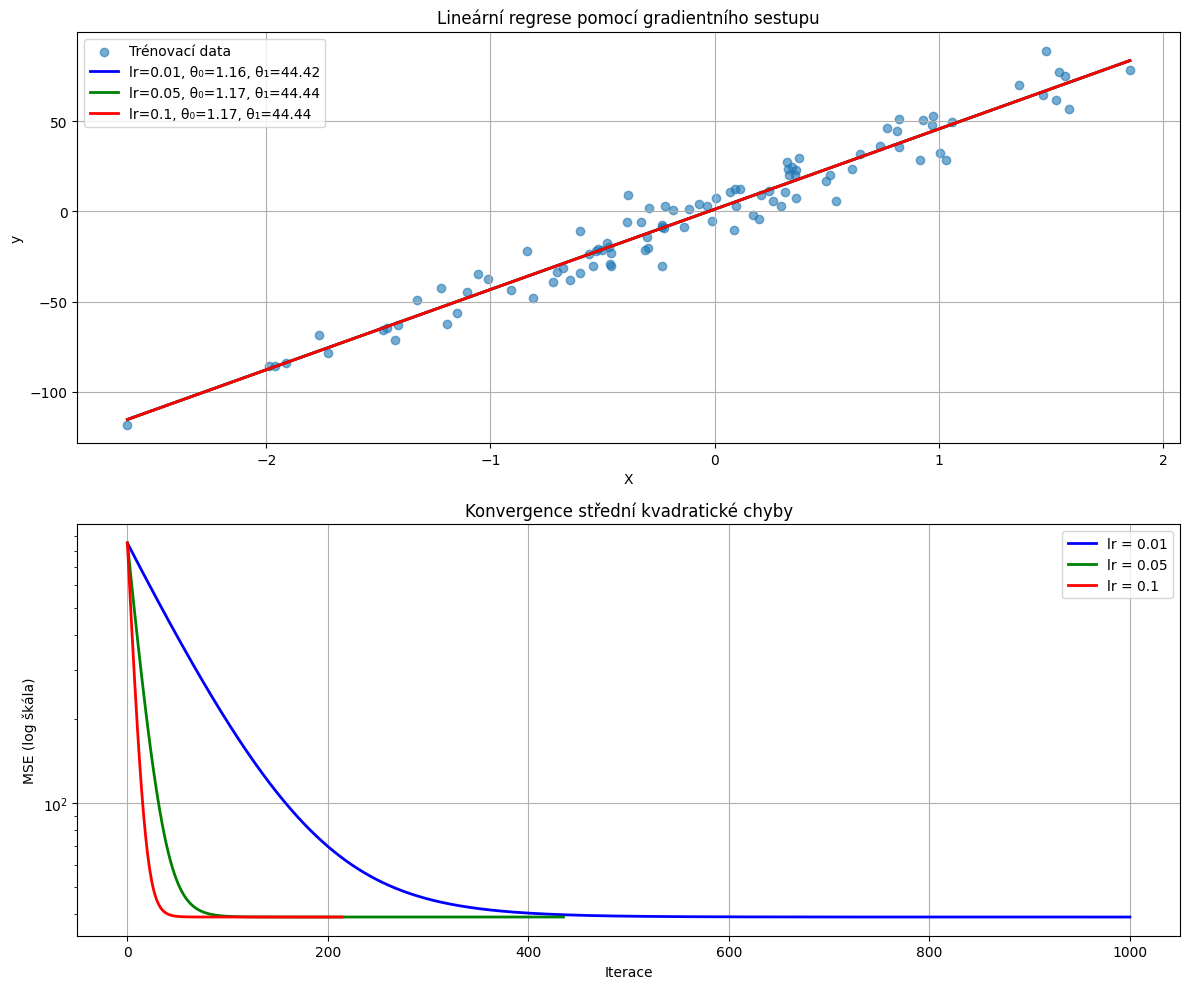


Analytické řešení pomocí normálních rovnic:
  θ₀ = 1.165115, θ₁ = 44.437170
  MSE: 39.027125


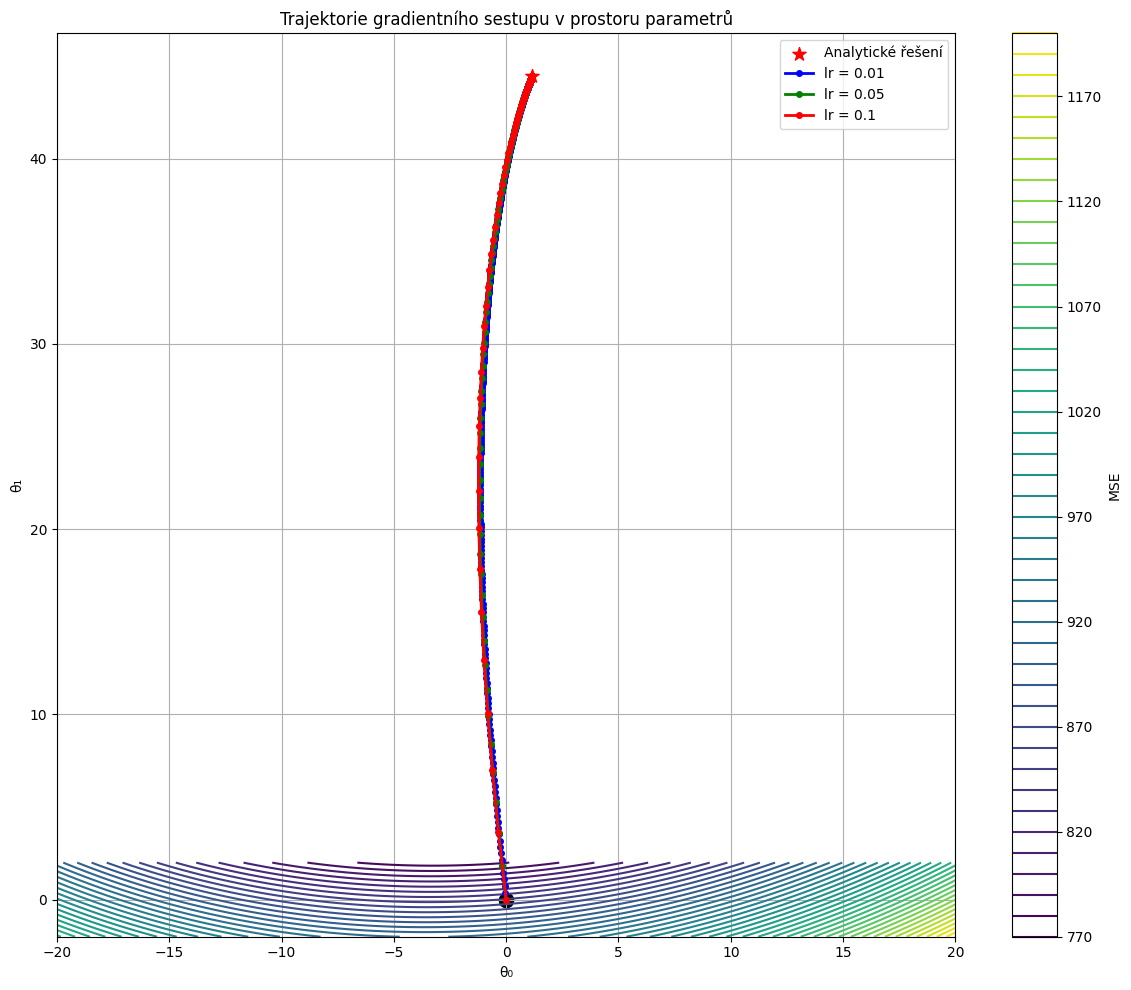

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generování syntetických dat pro regresi
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = X.reshape(-1)  # Převedení na 1D pole pro jednoduchost

# Funkce pro výpočet střední kvadratické chyby (MSE)
def mse(X, y, theta):
    m = len(y)
    predictions = theta[0] + theta[1] * X
    return (1/(2*m)) * np.sum((predictions - y)**2)

# Funkce pro výpočet gradientu MSE
def gradient_mse(X, y, theta):
    m = len(y)
    predictions = theta[0] + theta[1] * X
    errors = predictions - y
    
    grad_theta0 = (1/m) * np.sum(errors)
    grad_theta1 = (1/m) * np.sum(errors * X)
    
    return np.array([grad_theta0, grad_theta1])

# Implementace gradientního sestupu pro lineární regresi
def gradient_descent_lr(X, y, theta_init, learning_rate=0.01, tol=1e-6, max_iter=1000):
    theta = theta_init.copy()
    theta_history = [theta.copy()]
    cost_history = [mse(X, y, theta)]
    
    for i in range(max_iter):
        gradient = gradient_mse(X, y, theta)
        
        # Kontrola konvergence
        if np.linalg.norm(gradient) < tol:
            break
            
        # Aktualizace parametrů
        theta = theta - learning_rate * gradient
        
        # Uložení historie
        theta_history.append(theta.copy())
        cost_history.append(mse(X, y, theta))
    
    return np.array(theta_history), np.array(cost_history)

# Nastavení počátečních parametrů lineárního modelu
theta_init = np.array([0.0, 0.0])  # [intercept, coef]

# Trénování modelu pomocí gradientního sestupu
learning_rates = [0.01, 0.05, 0.1]
colors = ['b', 'g', 'r']

plt.figure(figsize=(12, 10))

# Vykreslení trénovacích dat
plt.subplot(2, 1, 1)
plt.scatter(X, y, alpha=0.6, label='Trénovací data')
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Lineární regrese pomocí gradientního sestupu')

# Optimalizace s různými učícími koeficienty
for i, lr in enumerate(learning_rates):
    theta_history, cost_history = gradient_descent_lr(X, y, theta_init, learning_rate=lr)
    
    # Vykreslení finální regresní přímky
    x_line = np.array([min(X), max(X)])
    y_line = theta_history[-1, 0] + theta_history[-1, 1] * x_line
    plt.plot(x_line, y_line, f'{colors[i]}-', linewidth=2, 
             label=f'lr={lr}, θ₀={theta_history[-1, 0]:.2f}, θ₁={theta_history[-1, 1]:.2f}')
    
    print(f"Učící koeficient lr = {lr}:")
    print(f"  Nalezené parametry: θ₀ = {theta_history[-1, 0]:.6f}, θ₁ = {theta_history[-1, 1]:.6f}")
    print(f"  Konečná hodnota MSE: {cost_history[-1]:.6f}")
    print(f"  Počet iterací: {len(cost_history)}")

plt.legend()

# Vykreslení konvergence chyby MSE
plt.subplot(2, 1, 2)
for i, lr in enumerate(learning_rates):
    _, cost_history = gradient_descent_lr(X, y, theta_init, learning_rate=lr)
    plt.semilogy(range(len(cost_history)), cost_history, colors[i], linewidth=2, label=f'lr = {lr}')

plt.grid(True)
plt.xlabel('Iterace')
plt.ylabel('MSE (log škála)')
plt.title('Konvergence střední kvadratické chyby')
plt.legend()
plt.tight_layout()
plt.show()

# Srovnání s analytickým řešením pomocí normálních rovnic
# Pro lineární regresi: θ = (X'X)^(-1)X'y, kde X obsahuje sloupec jedniček a sloupec hodnot X
X_design = np.column_stack((np.ones_like(X), X))
theta_analytical = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

print("\nAnalytické řešení pomocí normálních rovnic:")
print(f"  θ₀ = {theta_analytical[0]:.6f}, θ₁ = {theta_analytical[1]:.6f}")
print(f"  MSE: {mse(X, y, theta_analytical):.6f}")

# Vizualizace trajektorie parametrů v prostoru parametrů
# Vytvoříme grid hodnot parametrů a vypočítáme MSE pro každou kombinaci
theta0_range = np.linspace(-20, 20, 100)
theta1_range = np.linspace(-2, 2, 100)
Theta0, Theta1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(Theta0)

for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        Z[j, i] = mse(X, y, [Theta0[j, i], Theta1[j, i]])

plt.figure(figsize=(12, 10))

# Vykreslení vrstevnic funkce MSE
contour = plt.contour(Theta0, Theta1, Z, 50, cmap='viridis')
plt.colorbar(label='MSE')

# Vyznačení analytického řešení
plt.scatter(theta_analytical[0], theta_analytical[1], color='red', s=100, marker='*', 
            label='Analytické řešení')

# Vykreslení trajektorií gradientního sestupu pro různé učící koeficienty
for i, lr in enumerate(learning_rates):
    theta_history, _ = gradient_descent_lr(X, y, theta_init, learning_rate=lr)
    plt.plot(theta_history[:, 0], theta_history[:, 1], f'{colors[i]}-o', linewidth=2, markersize=4,
             label=f'lr = {lr}')
    
    # Vyznačení počátečního bodu
    plt.scatter(theta_init[0], theta_init[1], color='k', s=100, marker='o')

plt.grid(True)
plt.xlabel('θ₀')
plt.ylabel('θ₁')
plt.title('Trajektorie gradientního sestupu v prostoru parametrů')
plt.legend()
plt.tight_layout()
plt.show()

# Závěr

V této kapitole jsme se seznámili se základními přístupy k modelování reality pomocí matematických nástrojů. Prošli jsme cestu od jednoduchých mechanických modelů založených na Newtonových zákonech až po složitější systémy vykazující nelineární a chaotické chování. Dále jsme se zabývali optimalizačními úlohami a jejich řešením jak analytickými, tak numerickými metodami.

Klíčové poznatky zahrnují:

1. Kompromis mezi jednoduchostí a přesností modelů
2. Variační principy jako základní principy fungování přírodních zákonů
3. Analytické metody optimalizace založené na diferenciálním počtu
4. Numerické metody optimalizace včetně Newtonovy metody a gradientního sestupu
5. Aplikace optimalizačních metod ve strojovém učení

Tyto koncepty tvoří základní stavební kameny pro porozumění pokročilejším tématům v oblasti umělé inteligence a strojového učení, které budou předmětem dalších kapitol.